In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ModuleNotFoundError: No module named 'numpy'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/kaggle/input/gtd/globalterrorismdb_0718dist.csv", encoding = 'ISO-8859-1')
df.head()


/tmp/ipykernel_47/836934544.py:3: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/gtd/globalterrorismdb_0718dist.csv", encoding = 'ISO-8859-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.shape

(181691, 135)

In [ ]:
#dropping columns which has high number of null values
df.isnull().sum()
df.dropna(thresh=160000,inplace=True,axis=1)

In [ ]:
df.shape

(181691, 47)

In [ ]:
#know about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 47 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181256 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  crit1             181691 non-null  int64  
 16  crit2             18

In [ ]:
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1


In [ ]:
df.isnull().sum()

eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country                 0
country_txt             0
region                  0
region_txt              0
provstate             421
city                  435
latitude             4556
longitude            4557
specificity             6
vicinity                0
crit1                   0
crit2                   0
crit3                   0
doubtterr               1
multiple                1
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
targsubtype1        10373
targsubtype1_txt    10373
target1               638
natlty1              1559
natlty1_txt          1559
gname                   0
guncertain1           380
individual              0
weaptype1               0
weaptype1_txt           0
weapsubtype1        20768
weapsubtype1_txt    20768
nkill       

In [ ]:
#replacing Nan valules to zero only in int and float col
float_col = df.select_dtypes(include="float").columns
int_col=df.select_dtypes(include="int").columns
df[float_col]=df[float_col].fillna(0.0)
df[int_col] =  df[int_col].fillna(0)
df[float_col].sample(10)

,latitude,longitude,specificity,doubtterr,multiple,targsubtype1,natlty1,guncertain1,weapsubtype1,nkill,nwound,ishostkid
108530,32.689845,62.732388,2.0,0.0,0.0,13.0,4.0,0.0,8.0,4.0,0.0,0.0
78909,7.733107,81.688820,1.0,0.0,1.0,27.0,186.0,1.0,7.0,0.0,2.0,0.0
87345,21.638690,85.606944,3.0,0.0,1.0,61.0,92.0,1.0,5.0,0.0,10.0,0.0
179323,8.868648,126.050244,1.0,0.0,0.0,39.0,160.0,0.0,5.0,0.0,0.0,1.0
62296,-3.375828,29.364107,1.0,-9.0,0.0,6.0,34.0,0.0,7.0,5.0,0.0,0.0
77856,27.951203,85.684578,3.0,0.0,0.0,97.0,167.0,1.0,16.0,0.0,2.0,0.0
156868,34.889366,71.180493,3.0,0.0,0.0,36.0,4.0,0.0,0.0,6.0,7.0,0.0
181378,35.452110,44.375465,1.0,0.0,0.0,23.0,95.0,0.0,7.0,0.0,0.0,0.0
71425,18.527716,-72.332840,1.0,0.0,1.0,67.0,87.0,0.0,16.0,1.0,4.0,0.0
37653,13.692880,-89.199161,1.0,1.0,0.0,29.0,61.0,0.0,2.0,1.0,1.0,0.0


In [ ]:
df[int_col].sample(10)

,eventid,iyear,imonth,iday,extended,country,region,vicinity,crit1,crit2,...,suicide,attacktype1,targtype1,individual,weaptype1,property,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
104949,201201070009,2012,1,7,0,92,6,0,1,1,...,0,2,3,0,5,1,1,1,0,1
13823,198107010011,1981,7,1,0,61,2,0,1,1,...,0,2,2,0,5,1,-9,-9,0,-9
54980,199401250004,1994,1,25,0,185,8,0,1,1,...,0,3,1,0,6,1,0,1,0,1
4114,197609010004,1976,9,1,0,603,8,0,1,1,...,0,1,14,0,5,0,0,0,1,1
44877,199012140010,1990,12,14,0,45,3,0,1,1,...,0,3,1,0,6,1,-9,-9,0,-9
177042,201707160044,2017,7,16,0,95,10,0,1,1,...,0,3,14,0,6,-9,0,1,0,1
124148,201312010045,2013,12,1,0,160,5,0,1,1,...,0,1,2,0,5,0,-9,-9,0,-9
131238,201405030053,2014,5,3,0,104,11,0,1,1,...,0,3,1,0,6,1,1,1,0,1
71958,200103020005,2001,3,2,0,153,6,0,1,1,...,0,7,14,0,8,1,0,0,0,0
115994,201304130030,2013,4,13,0,19,6,0,1,0,...,0,3,22,0,6,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 47 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181256 non-null  object 
 11  latitude          181691 non-null  float64
 12  longitude         181691 non-null  float64
 13  specificity       181691 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  crit1             181691 non-null  int64  
 16  crit2             18

In [ ]:
df.shape

(181691, 47)

In [ ]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,weaptype1,weapsubtype1,nkill,nwound,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,1.816910e+05,181691.000000,...,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,22.909109,-4.471911e+02,1.451404,...,6.447325,9.846426,2.266860,2.883296,-0.544556,0.058996,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.699442,2.021946e+05,0.995448,...,2.173435,7.062747,11.227057,34.309747,3.122889,0.461022,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,0.000000,...,1.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,9.518645,1.231572e+00,1.000000,...,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.126646,4.314357e+01,1.000000,...,6.000000,11.000000,0.000000,0.000000,1.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.538561,6.835734e+01,1.000000,...,6.000000,16.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,13.000000,31.000000,1570.000000,8191.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#basic analysis

print("most attacked country ",df.country_txt.value_counts().index[0])
print("most attacked city ",df.city.value_counts().index[1])
print("most attacked reigion",df.region_txt.value_counts().index[0])
print("how many people werw killed in terrorist attack",df.nkill.sum())
print("which year most attack was executed",df.iyear.value_counts().index[0])

most attacked country  Iraq
most attacked city  Baghdad
most attacked reigion Middle East & North Africa
how many people killed in terrorist attack 411868.0
which year most attack was executed 2014


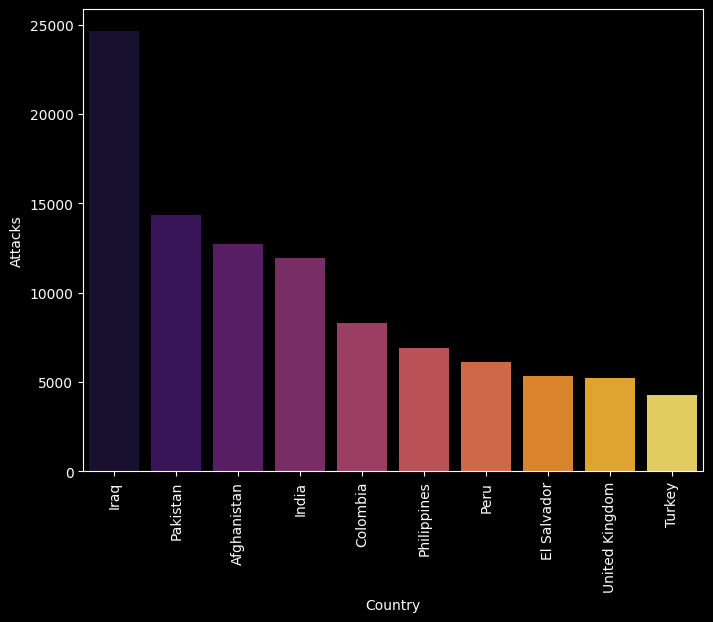

In [ ]:
#top 10 country 
plt.style.use("dark_background")
plt.figure(figsize=(8,6))
sns.barplot(x=df["country_txt"].value_counts()[:10].index,y=df['country_txt'].value_counts()[:10].values,palette="inferno")
plt.xlabel("Country")
plt.ylabel("Attacks")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#yearwise terrorist attack
plt.figure(figsize=(8,8))
sns.barplaot(x=df.iyear.va,y=df.iyear.value_counts())